In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rfest import GLM
from rfest.utils import build_design_matrix, split_data, get_spatial_and_temporal_filters
from rfest.simulate import gaussian1d, gaussian2d, noise2d
from rfest.check import plot3d, plot_diagnostics
from rfest.metrics import mse

In [2]:
dt = 0.1
tt = np.arange(0, 5+dt, dt)[::-2][1:]
w_true_t = np.exp(-tt) * np.sin(6 * tt ** 0.25)
w_true_s = gaussian2d()

w_true = np.kron(w_true_t, w_true_s.flatten())

Text(0.5, 1.0, 'Temporal')

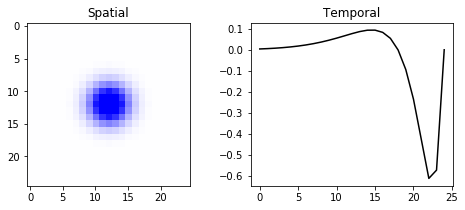

In [3]:
dims = [25, 25, 25]
sRF, tRF = get_spatial_and_temporal_filters(w_true, dims)

vmax = np.max([np.abs(w_true.max()), np.abs(w_true.min())])

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].imshow(sRF, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax, label='Spatial')
ax[0].set_title('Spatial')
ax[1].plot(-tRF, color='black', label='Temporal')
ax[1].set_title('Temporal')

In [4]:

dims = [25, 25, 25]
df = [13, 13, 13]
np.prod(dims), np.prod(df) * 1

(15625, 2197)

In [5]:
from rfest.check import significance

In [6]:
# significance(m1)

In [7]:
np.random.seed(2046)
X = noise2d(n_samples=int(15625), dims=dims, design_matrix=False)
Xdsgn = build_design_matrix(X, nlag=25)
y_true = Xdsgn @ w_true.flatten()
y = np.random.normal(y_true, scale=1.)
(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, y, dt=0.033, 
                                                                  frac_train=0.5, frac_dev=0.25, verbose=1)

m0 = GLM(distr='gaussian', output_nonlinearity='none')
m0.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='none', name='stimulus') # light stimulus
m0.add_design_matrix(X_dev, dims=dims, name='stimulus', kind='dev')
m0.initialize({'train': y_train, 'dev': y_dev}, num_subunits=1, dt=dt, method='mle', random_seed=2046)
m0.fit(num_iters=800, verbose=100, step_size=0.1, beta=1.)

SUMMARY
               N    Minutes   Fraction
Total      15625       8.59        1.0
Train       7818        4.3        0.5
Dev         3909       2.15       0.25
Test        3898       2.15       0.25


Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.344	 10284.259	  4191.155	     0.472	     0.444
  100	     4.817	  3919.979	  2277.321	     0.786	     0.674
  200	     8.303	  3874.501	  2244.137	     0.788	     0.681
  300	    11.782	  3873.689	  2247.588	     0.788	     0.680
  400	    16.387	  3874.004	  2249.154	     0.788	     0.680
  500	    23.214	  3873.928	  2247.134	     0.788	     0.680
  600	    28.643	  3874.922	  2246.943	     0.788	     0.680
  700	    34.456	  3874.597	  2246.365	     0.788	     0.680
Stop: reached 800 steps.



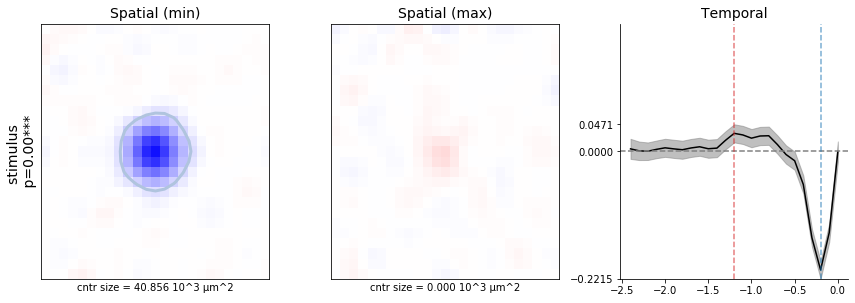

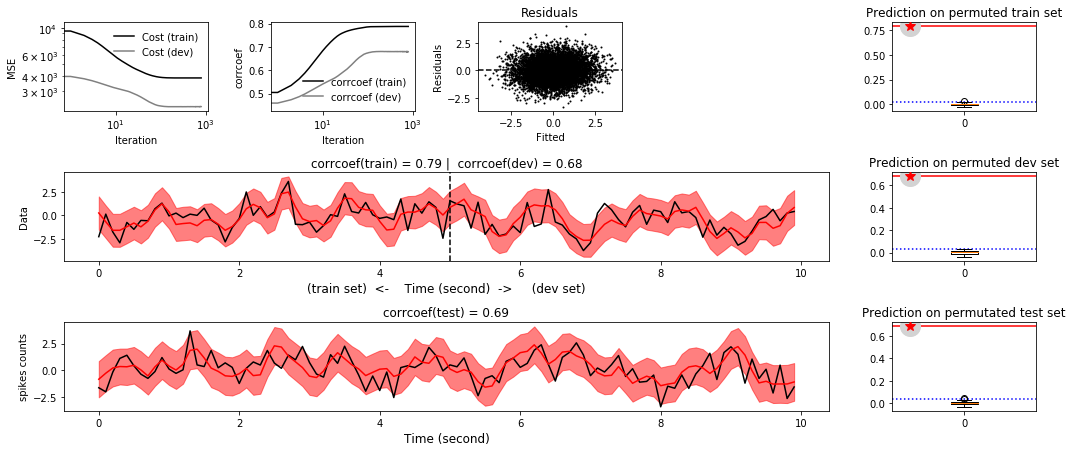

In [8]:
plot3d(m0, contour=0.03)
plot_diagnostics(m0, X_test, y_test, display_window=10)

In [9]:
np.random.seed(2046)
X = noise2d(n_samples=int(15625/2), dims=dims, design_matrix=False)
Xdsgn = build_design_matrix(X, nlag=25)
y_true = Xdsgn @ w_true.flatten()
y = np.random.normal(y_true, scale=1.)
(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, y, dt=0.033, 
                                                                  frac_train=0.5, frac_dev=0.25, verbose=1)

SUMMARY
               N    Minutes   Fraction
Total       7812        4.3        1.0
Train       3909       2.15        0.5
Dev         1945       1.07       0.25
Test        1958       1.07       0.25


In [10]:
m1 = GLM(distr='gaussian', output_nonlinearity='none')
m1.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='none', name='stimulus') # light stimulus
m1.add_design_matrix(X_dev, dims=dims, name='stimulus', kind='dev')
m1.initialize({'train': y_train, 'dev': y_dev}, num_subunits=1, dt=dt, method='mle', random_seed=2046)
m1.fit(num_iters=800, verbose=100, step_size=0.1, beta=1.)

Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.009	 49606.283	 21151.362	     0.167	     0.212
  100	     3.539	  4543.431	  3517.857	     0.734	     0.437
  200	     6.530	  2265.413	  1346.037	     0.806	     0.646
  300	     9.227	  1976.033	  1119.252	     0.811	     0.700
  400	    12.640	  1953.347	  1105.115	     0.811	     0.703
  500	    16.041	  1953.217	  1105.468	     0.811	     0.703
Stop at 500 steps: cost (dev) has been monotonically increasing for 10 steps.



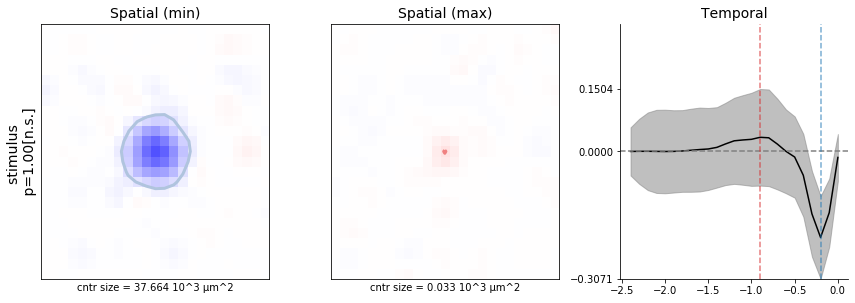

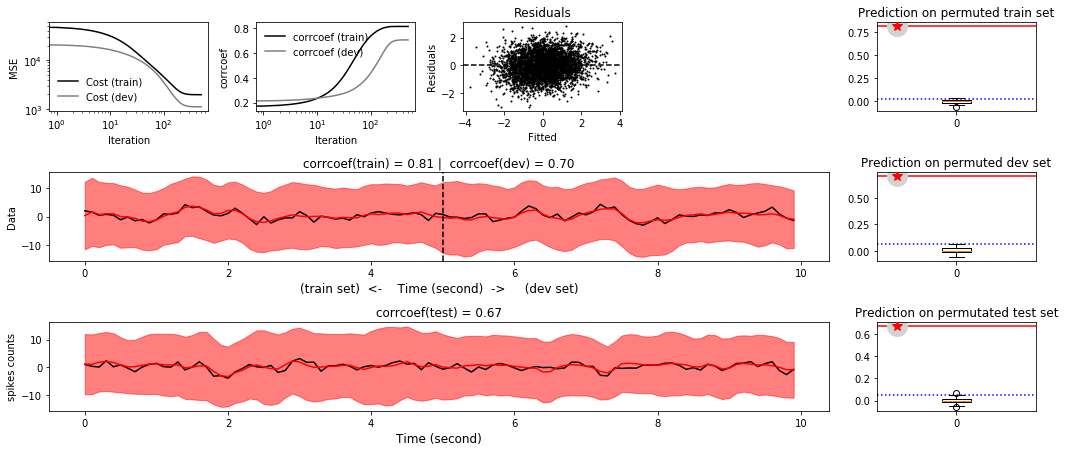

In [11]:
plot3d(m1, contour=0.03)
plot_diagnostics(m1, X_test, y_test, display_window=10)

In [12]:
np.random.seed(2046)
X = noise2d(n_samples=int(15625), dims=dims, design_matrix=False)
Xdsgn = build_design_matrix(X, nlag=25)
y_true = Xdsgn @ w_true.flatten()
y = np.random.normal(y_true, scale=3.)
(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, y, dt=0.033, 
                                                                  frac_train=0.5, frac_dev=0.25, verbose=1)
m2 = GLM(distr='gaussian', output_nonlinearity='none')
m2.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='none', name='stimulus') # light stimulus
m2.add_design_matrix(X_dev, dims=dims, name='stimulus', kind='dev')
m2.initialize({'train': y_train, 'dev': y_dev}, num_subunits=1, dt=dt, method='mle', random_seed=2046)
m2.fit(num_iters=800, verbose=100, step_size=0.1, beta=1.)

SUMMARY
               N    Minutes   Fraction
Total      15625       8.59        1.0
Train       7818        4.3        0.5
Dev         3909       2.15       0.25
Test        3898       2.15       0.25
Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.319	 64588.748	 29725.165	     0.097	     0.088
  100	     4.813	 29367.119	 21835.091	     0.583	     0.194
  200	     8.358	 28919.064	 22559.464	     0.595	     0.182
  300	    12.724	 28895.958	 22720.789	     0.596	     0.179
Stop at 326 steps: cost (dev) has been monotonically increasing for 10 steps.



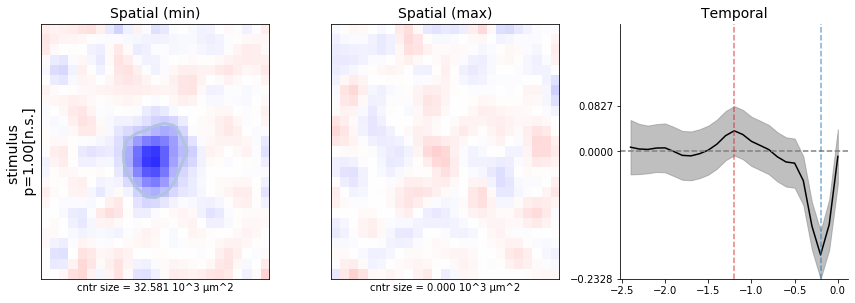

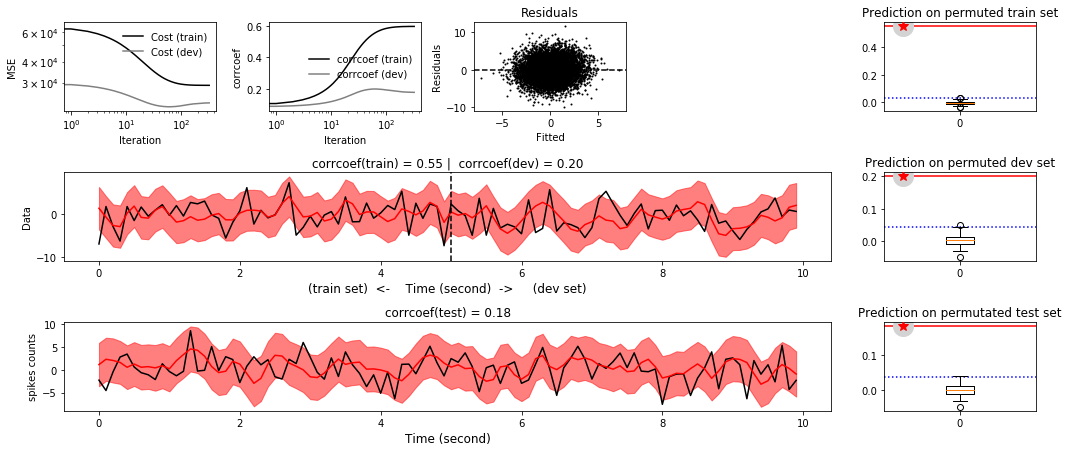

In [13]:
plot3d(m2, contour=0.03)
plot_diagnostics(m2, X_test, y_test, display_window=10)

In [14]:
np.random.seed(2046)
X = noise2d(n_samples=int(15625), dims=dims, design_matrix=False)
Xdsgn = build_design_matrix(X, nlag=25)
y_true = Xdsgn @ w_true.flatten()
y = np.random.normal(y_true, scale=1.)
(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, y, dt=0.033, 
                                                                  frac_train=0.5, frac_dev=0.25, verbose=1)

m3 = GLM(distr='gaussian', output_nonlinearity='none')
m3.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='none', name='stimulus') # light stimulus
m3.add_design_matrix(X_dev, dims=dims, name='stimulus', kind='dev')

m3.initialize({'train': np.random.permutation(y_train), 'dev': np.random.permutation(y_dev)}, num_subunits=1, dt=dt, method='mle', random_seed=2046)
m3.fit(num_iters=800, verbose=100, step_size=0.1, beta=0.)

SUMMARY
               N    Minutes   Fraction
Total      15625       8.59        1.0
Train       7818        4.3        0.5
Dev         3909       2.15       0.25
Test        3898       2.15       0.25
Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.365	 13885.865	  6455.210	    -0.011	    -0.017
  100	     5.109	  6198.601	  6417.405	     0.526	    -0.016
  200	     8.842	  6193.657	  6530.469	     0.527	    -0.017
  300	    12.685	  6193.654	  6530.977	     0.527	    -0.017
Stop at 301 steps: cost (train) has been changing less than 1e-5 for 10 steps.



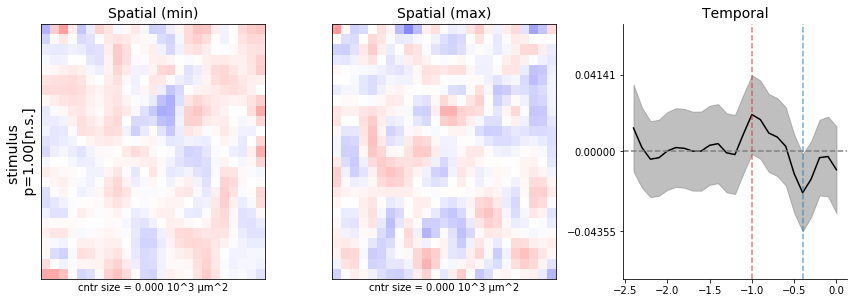

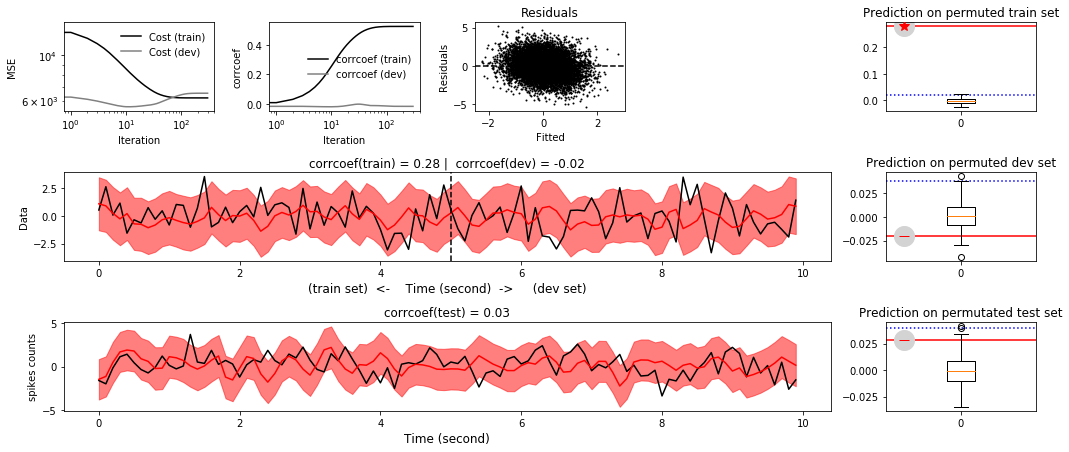

In [15]:
plot3d(m3, contour=0.03)
plot_diagnostics(m3, X_test, y_test, display_window=10)

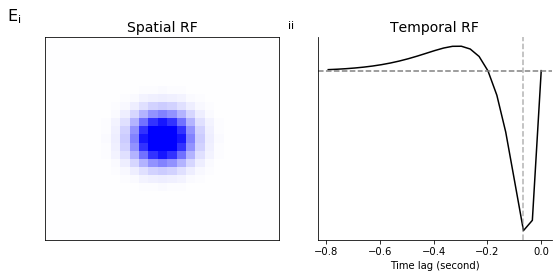

In [314]:
def plot_gt(sRF, tRF, figsize=None, number='E'):
    import matplotlib.gridspec as gridspec
    
    ncols = 7
    nrows = 1
    figsize = figsize if figsize is not None else (13.5, 4)
    fig = plt.figure(figsize=figsize)

    vmax = np.max([np.abs(w_true.max()), np.abs(w_true.min())])

    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)
    
    ax_sRF_min = fig.add_subplot(spec[0, :2])
    ax_sRF_min.imshow(-sRF, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax, aspect="auto")
    ax_sRF_min.set_xticks([])
    ax_sRF_min.set_yticks([])
    ax_sRF_min.text(-0.1, 1.15, f'{number}'+'$\mathrm{_{i}}$', transform=ax_sRF_min.transAxes, fontsize=16, fontweight='normal', va='top', ha='right')

    
    dims = [25, ]
    shift = 0
    dt = 0.033
    t_tRF = np.linspace(-(dims[0] + shift) * dt, -shift * dt, dims[0] + 1)[1:]
    ax_tRF = fig.add_subplot(spec[0, 2:4])
    ax_tRF.plot(t_tRF, tRF, color='black')
    ax_tRF.set_xlabel('Time lag (second)')
    ax_tRF.axhline(0, color='gray', linestyle='--')
    tRF_min = np.argmin(tRF)
    ax_tRF.axvline(t_tRF[tRF_min], color='gray', linestyle='--', alpha=0.6)
    ax_tRF.spines['top'].set_visible(False)
    ax_tRF.spines['right'].set_visible(False)
#     ax_tRF.set_yticks([tRF.min(), 0, tRF.max()])
#     ax_tRF.set_ylim(-vmax, vmax)    

    ax_sRF_min.set_title('Spatial RF', fontsize=14)
    ax_tRF.set_title('Temporal RF', fontsize=14)
    ax_tRF.set_yticks([])
    ax_tRF.text(-0.1, 1.1, '$\mathrm{_{ii}}$', transform=ax_tRF.transAxes, fontsize=16, fontweight='normal', va='top', ha='right')




    fig.tight_layout()
    
plot_gt(w_true_s, w_true_t)
plt.savefig('figs/Figure7_GT.pdf')

In [56]:
import rfest
import imp
imp.reload(rfest)
imp.reload(rfest.check)
import scipy.stats

from rfest.utils import uvec, get_spatial_and_temporal_filters

def plot_metric(model, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    ax.plot(model.metric_train, color='black', label=f'Train')
    if 'dev' in model.y:
        ax.plot(model.metric_dev, color='gray', label=f'Validation')
    ax.set_xscale('log')
    ax.set_ylabel(f'{model.metric}')
    ax.set_xlabel('Iteration')
    ax.legend(frameon=False)

def plot_prediction_testset(model, X_test, y_test, display_window, w_type, ax=None):
    
    if ax is None:
        _, ax = plt.subplots()
    
    dt = model.dt
    length = get_n_samples(display_window / 60, dt)
    y = y_test

    _ = model.predict(X_test, w_type)

    y = y[model.burn_in:]
    y_pred = model.y_pred[w_type]['test'] 
    y_pred_lower = model.y_pred_lower[w_type]['test']
    y_pred_upper = model.y_pred_upper[w_type]['test']

    s = model._score(y, model.forwardpass(model.p[w_type], 'test'), model.metric)

    tt = np.arange(len(y[:length])) * dt
    ax.plot(tt, y[:length], color='black')
    ax.plot(tt, y_pred[:length], color='red')  

    ax.fill_between(tt, y_pred_upper[:length], y_pred_lower[:length], color='red', alpha=0.5)

    ax.set_xlabel('Time (second)', fontsize=12)
    ax.set_ylabel('spikes counts')
    ax.set_title(f'{model.metric}(test) = {s:.2f}')

def plot_permutation(model, kind='train', w_type='opt', q=99, num_repeat=100, ax=None, legend=False):
    
    if ax is None:
        _, ax = plt.subplots()
    
    X0 = model.X[kind].copy()
    XS0 = model.XS[kind].copy()

    score_true = model._score(model.y[kind], model.forwardpass(model.p[w_type], kind), model.metric)
    
    # start permutation
    s_perm = []
    for _ in range(num_repeat):
        for name in model.filter_names:
            if name in model.S:
                model.XS[kind][name] = np.random.permutation(model.XS[kind][name])
            else:
                model.X[kind][name] = np.random.permutation(model.X[kind][name])
                
        s_perm.append(model._score(model.y[kind], model.forwardpass(model.p[w_type], kind), model.metric))
    else:
        for name in model.filter_names:
            if name in model.S:
                model.XS[kind][name] = XS0[name] 
            else:
                model.X[kind][name] = X0[name]

    q = int(q)
    perc = np.percentile(s_perm, q=q)
    
    
    line = ax.axhline(score_true, c='r', zorder=0)
    line_q = ax.axhline(perc, c='gray', ls=':', zorder=0)
    
    bp = ax.boxplot(s_perm, positions=[0])
    # ax.axhline(score_true, color='black', linestyle='--')
    ax.plot(-0.3, score_true, marker='o', color='lightgray', ms=20, zorder=2, alpha=1)
    t_value, p_value = scipy.stats.ttest_1samp(s_perm, score_true, alternative='less')
    is_greater = p_value < 0.05 
    ax.plot(-0.3, score_true, marker="*" if is_greater else "_", color='r', ms=10, zorder=3)
#     ax.text(0, 1, f'')
    stars = '*'
    if p_value < 0.001:
        stars *= 3
        ax.set_title(f'p<0.001{stars} ')
    elif p_value<0.01:
        stars *= 2
        ax.set_title(f'p<0.01{stars} ')
    elif p_value<0.05:
        stars *= 1
        ax.set_title(f'p<0.05{stars} ')
    else:
        stars = '[n.s.]'
        ax.set_title(f'p>0.05{stars} ')

#     if legend:
#         ax.legend(handles=[line, bp["boxes"][0], line_q], labels=['model pred.', 'permuted pred.', f'99% quentile'])
#     ax.set_title(f'p={p_value:.02f}')
    ax.set_xlim([-0.4, 0.4])
    
def plot(model, w_type='opt',contour=0.1, pixel_size=30, figsize=None, return_stats=False, legend=False, number='A'):
    
    import matplotlib.gridspec as gridspec
    import warnings
    warnings.filterwarnings("ignore")

    dt = model.dt
    dims = model.dims
    shift = model.shift

    # rf
    ws = model.w[w_type]
    ws_se = model.w_se[w_type]
    
    ncols = 7
    nrows = 1
    figsize = figsize if figsize is not None else (13.5, 4)
    fig = plt.figure(figsize=figsize)

    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

    # plot RF and get stats
    stats = {}
    RF_data = {}
    ax_data = {}
    
    W_score, p_values = significance(model, w_type)
    
    for i, name in enumerate(ws):

        if 'stimulus' in name:

            RF_data[name] = {

                "sRFs_min": [],
                "sRFs_max": [],
                "tRFs": [],
                "sRFs_min_cntr": [],
                "sRFs_max_cntr": [],
            }
            ax_data[name] = {
                "axes_sRF_min": [],
                "axes_sRF_max": [],
                "axes_tRF": [],
            }

            stats[name] = {
                'tRF_time_min': [],
                'tRF_time_max': [],
                'tRF_activation_min': [],
                'tRF_activation_max': [],
                'tRF_time_diff': [],
                'tRF_activation_diff': [],
                'sRF_size_min': [],
                'sRF_size_max': [],
                'sRF_size_diff': [],
            }

            t_tRF = np.linspace(-(dims[name][0] + shift[name]) * dt, -shift[name] * dt, dims[name][0] + 1)[1:]

            w = ws[name].flatten()
            w_uvec = uvec(ws[name].flatten())
            w_se = ws_se[name].flatten()
            
            wu = w + 2 * w_se
            wl = w - 2 * w_se
            
            vmax = np.max([np.abs(w.max()), np.abs(w.min()), np.abs(wu.max()), np.abs(wu.min()), np.abs(wl.max()), np.abs(wl.min())])
            
            w = w.reshape(dims[name])
            wu = wu.reshape(dims[name])
            wl = wl.reshape(dims[name])
            w_uvec = w_uvec.reshape(dims[name])
            
            sRF, tRF = get_spatial_and_temporal_filters(w, model.dims[name])
            ref = [sRF[2:, 2:].max(), sRF[2:, 2:].min()][np.argmax([np.abs(sRF.max()), np.abs(sRF.min())])]
            max_coord = np.where(sRF == ref)

            tRF = w[:, max_coord[0], max_coord[1]].flatten()
            tRFu = wu[:, max_coord[0], max_coord[1]].flatten()
            tRFl = wl[:, max_coord[0], max_coord[1]].flatten()
            
            tRF_max = np.argmax(tRF)
            sRF_max = w[tRF_max]
            sRF_max_uvec = w_uvec[tRF_max]
            tRF_min = np.argmin(tRF)
            sRF_min = w[tRF_min]
            sRF_min_uvec = w_uvec[tRF_min]

            RF_data[name]['sRFs_max'].append(sRF_max_uvec)
            RF_data[name]['sRFs_min'].append(sRF_min_uvec)
            RF_data[name]['tRFs'].append(tRF)

            ax_sRF_min = fig.add_subplot(spec[:, :2])
            ax_data[name]['axes_sRF_min'].append(ax_sRF_min)

            ax_sRF_min.imshow(sRF_min.T, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax, aspect="auto")
            ax_sRF_min.set_xticks([])
            ax_sRF_min.set_yticks([])
            ax_sRF_min.text(-0.1, 1.15, f'{number}'+'$\mathrm{_{i}}$', transform=ax_sRF_min.transAxes, fontsize=16, fontweight='normal', va='top', ha='right')

#             ax_sRF_max = fig.add_subplot(spec[i, 1])
#             ax_data[name]['axes_sRF_max'].append(ax_sRF_max)
#             ax_sRF_max.imshow(sRF_max.T, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax, aspect="auto")
#             ax_sRF_max.set_xticks([])
#             ax_sRF_max.set_yticks([])

            ax_tRF = fig.add_subplot(spec[:, 2:4])
            ax_data[name]['axes_tRF'].append(ax_tRF)
            ax_tRF.plot(t_tRF, tRF, color='black')
            ax_tRF.fill_between(t_tRF, tRFu, tRFl, color='gray', alpha=0.5)
            ax_tRF.set_xlabel('Time lag (second)', fontsize=14)
            ax_tRF.axhline(0, color='gray', linestyle='--')
#             ax_tRF.axvline(t_tRF[tRF_max], color='C3', linestyle='--', alpha=0.6)
            ax_tRF.axvline(t_tRF[tRF_min], color='black', linestyle='--', alpha=0.6)
            ax_tRF.spines['top'].set_visible(False)
            ax_tRF.spines['right'].set_visible(False)
#             ax_tRF.set_yticks([tRFl.min(), 0, tRFu.max()])
            ax_tRF.set_yticks([])
            ax_tRF.set_ylim(-vmax, vmax)
            ax_tRF.text(-0.1, 1.1, '$\mathrm{_{ii}}$', transform=ax_tRF.transAxes, fontsize=16, fontweight='normal', va='top', ha='right')


        
            stats[name]['tRF_time_min'].append(t_tRF[tRF_min])
            stats[name]['tRF_time_max'].append(t_tRF[tRF_max])
            stats[name]['tRF_activation_min'].append(float(tRF[tRF_min]))
            stats[name]['tRF_activation_max'].append(float(tRF[tRF_max]))

            stats[name]['tRF_time_diff'].append(np.abs(t_tRF[tRF_max] - t_tRF[tRF_min]))
            stats[name]['tRF_activation_diff'].append(np.abs(tRF[tRF_max] - tRF[tRF_min]))

#             if i == 0:
#                 ax_sRF_min.set_title('Spatial Profile', fontsize=14)
#                 ax_tRF.set_title('Temporal Profile', fontsize=14)

            p = p_values[name]
            
            stars = '*'
            
            if p < 0.001:
                stars *= 3
                ax_sRF_min.set_ylabel(f'p<0.001{stars} ', fontsize=14)
            elif p<0.01:
                stars *= 2
                ax_sRF_min.set_ylabel(f'p<0.01{stars} ', fontsize=14)
            elif p<0.05:
                stars *= 1
                ax_sRF_min.set_ylabel(f'p<0.05{stars} ', fontsize=14)
            else:
                stars = '[n.s.]'
                ax_sRF_min.set_ylabel(f'p>0.05{stars} ', fontsize=14)


                
            
    ax_metric = fig.add_subplot(spec[0, 4:6])
    plot_metric(model, ax=ax_metric)
    ax_metric.spines['top'].set_visible(False)
    ax_metric.spines['right'].set_visible(False)   
    ax_metric.set_ylabel('Correlated Coefficient', fontsize=14)
    ax_metric.set_xlabel('Iteration', fontsize=14)
    ax_metric.text(-0.1, 1.1, '$\mathrm{_{iii}}$', transform=ax_metric.transAxes, fontsize=16, fontweight='normal', va='top', ha='right')


#     ax_metric.set_title('Metrics')
    
#     ax_train = fig.add_subplot(spec[0, 3])
#     plot_permutation(model, kind='train', w_type='opt', num_repeat=100, ax=ax_train)
    
    
    ax_dev = fig.add_subplot(spec[0, -1])
    plot_permutation(model, kind='dev', w_type='opt', num_repeat=100, ax=ax_dev, legend=legend)
#     ax_dev.set_title('')
    ax_dev.set_xlabel('Prediction on \npermutated validation set', fontsize=14)
    ax_dev.set_xticks([])
    ax_dev.spines['top'].set_visible(False)
    ax_dev.spines['right'].set_visible(False)  
    ax_dev.text(-0.1, 1.1, '$\mathrm{_{iv}}$', transform=ax_dev.transAxes, fontsize=16, fontweight='normal', va='top', ha='right')


    
    fig.tight_layout()

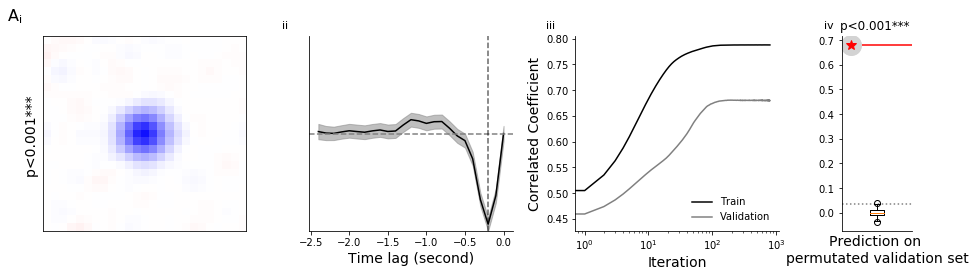

In [62]:
plot(m0, legend=True, number='A')
# plt.savefig('figs/Figure7A.pdf')

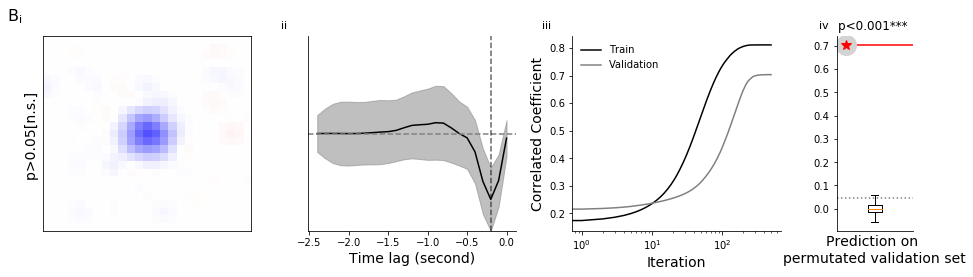

In [58]:
plot(m1, number='B')
# plt.savefig('figs/Figure7B.pdf')

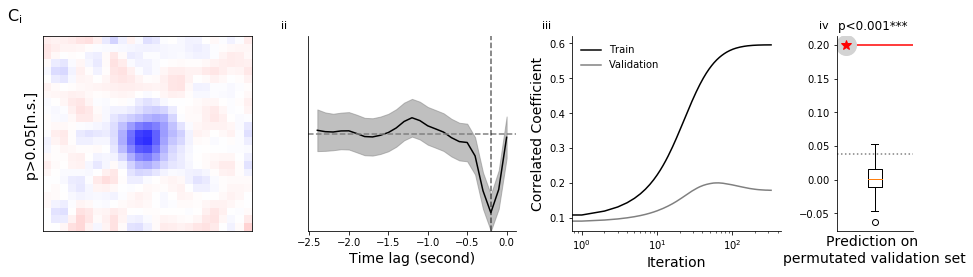

In [59]:
plot(m2, number='C')
# plt.savefig('figs/Figure7C.pdf')

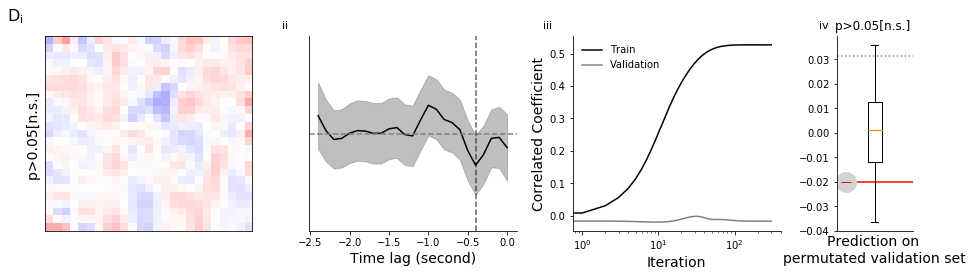

In [60]:
plot(m3, number='D')
# plt.savefig('figs/Figure7D.pdf')